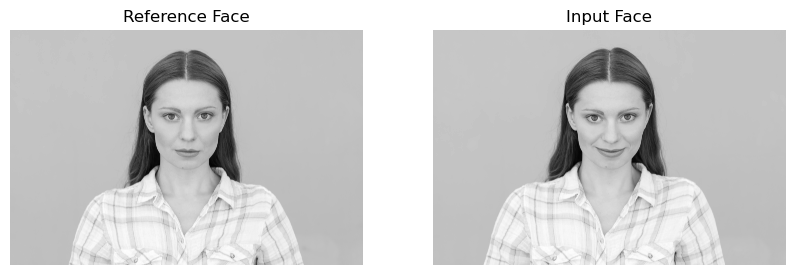

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


ref_img = plt.imread("reference_face.jpg")
inp_img = plt.imread("input_face.jpg")
img3 = plt.imread("different.jpg")
img4 = plt.imread("similar.png")

ref_img = ref_img[:,:,:3]
inp_img = inp_img[:,:,:3]
img3 = img3[:,:,:3]
img4 = img4[:,:,:3]


gray_ref = ref_img.mean(axis=2)
gray_inp = inp_img.mean(axis=2)
gray3 = img3.mean(axis=2)
gray4 = img4.mean(axis=2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray_ref, cmap="gray")
plt.title("Reference Face")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray_inp, cmap="gray")
plt.title("Input Face")
plt.axis("off")

plt.show()

In [22]:

min_h = min(gray_ref.shape[0], gray_inp.shape[0], gray3.shape[0], gray4.shape[0])
min_w = min(gray_ref.shape[1], gray_inp.shape[1], gray3.shape[1], gray4.shape[1])

g1 = gray_ref[:min_h, :min_w]
g2 = gray_inp[:min_h, :min_w]
g3 = gray3[:min_h, :min_w]
g4 = gray4[:min_h, :min_w]

g1.shape, g2.shape, g3.shape, g4.shape


# plt.figure(figsize=(10,4))

# plt.subplot(1,2,1)
# plt.imshow(g1, cmap="gray")
# plt.title("Reference (Aligned)")
# plt.axis("off")

# plt.subplot(1,2,2)
# plt.imshow(g2, cmap="gray")
# plt.title("Input (Aligned)")
# plt.axis("off")

# plt.show()

((1536, 1024), (1536, 1024), (1536, 1024), (1536, 1024))

In [31]:
g1_f = g1.astype("float64")
g2_f = g2.astype("float64")

diff = g1_f - g2_f

mae = np.mean(np.abs(diff))
mse = np.mean(diff ** 2)

print("MAE:", mae)
print("MSE:", mse)

threshold = 12  

if mae < threshold:
     result_text = "Matched Face"
else:
    result_text = "Not Matched Face "



MAE: 1.5209715101453989
MSE: 3.071318732367622


NameError: name 'result' is not defined

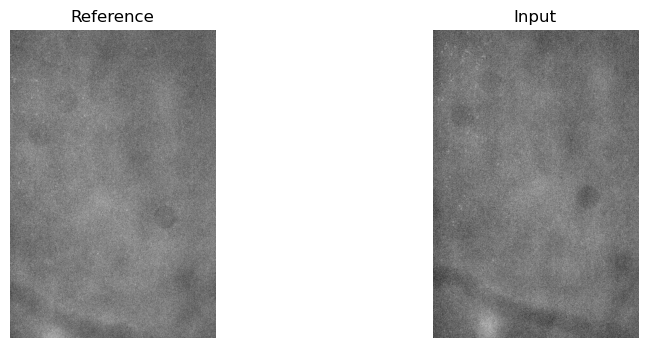

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

axes[0].imshow(g1, cmap="gray")
axes[0].set_title("Reference")
axes[0].axis("off")

axes[1].imshow(g2, cmap="gray")
axes[1].set_title("Input")
axes[1].axis("off")

plt.suptitle(f"{result}\nMAE={mae:.2f}   MSE={mse:.2f}")
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

images = [g2, g3, g4]
names = ["Input_1", "Different", "Similar"]
results = []

for name, img in zip(names, images):
    img_f = img.astype("float64")
    g1_f = g1.astype("float64")
    
    diff = g1_f - img_f

    mae_i = np.mean(np.abs(diff))
    mse_i = np.mean(diff ** 2)

    results.append({
        "Image": name,
        "MAE": mae_i,
        "MSE": mse_i
    })

df = pd.DataFrame(results)
df


ValueError: operands could not be broadcast together with shapes (4815,7215) (4082,6123) 

In [8]:
plt.figure(figsize=(7,4))
plt.bar(df["Image"], df["MSE"])
plt.xlabel("Image")
plt.ylabel("MSE")
plt.title("MSE Comparison Between Images")
plt.show()

NameError: name 'df' is not defined

<Figure size 700x400 with 0 Axes>